        Portfolio Chilean Companies

In [1]:
import pandas as pd
import numpy as np
import datetime as dt   
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from scipy.optimize import minimize

In [2]:
tickers = ['BSANTANDER.SN', 'FALABELLA.SN', 'CENCOSUD.SN', 'ENTEL.SN', 'CMPC.SN', 
           'COPEC.SN', 'CAP.SN', 'SQM-B.SN', 'VAPORES.SN', 'ANDINA-B.SN']
data = yf.download(tickers, start= '2020-01-01', end = '2024-01-31')['Close']
data.head()

[*********************100%***********************]  10 of 10 completed


Ticker,ANDINA-B.SN,BSANTANDER.SN,CAP.SN,CENCOSUD.SN,CMPC.SN,COPEC.SN,ENTEL.SN,FALABELLA.SN,SQM-B.SN,VAPORES.SN
Date,,,,,,,,,,
2020-01-02,1465.234863,34.292393,3732.225342,795.640808,1806.954224,7098.312500,2846.723145,3167.683350,18871.839844,25.441204
2020-01-03,1472.703613,34.901318,3791.836426,794.796021,1811.672363,7188.290527,2899.440186,3183.840088,18905.986328,25.413162
2020-01-06,1480.171997,35.456287,3734.840088,794.872925,1852.246216,7348.251953,2884.099365,3221.856689,19380.318359,25.001923
2020-01-07,1493.684082,35.687523,3699.544434,801.093445,1849.415283,7543.006348,2899.440186,3278.880371,19850.039062,25.123423
2020-01-08,1500.541870,35.610443,3685.164307,784.120911,1849.415283,7458.226562,2932.652100,3284.487793,19729.150391,24.786947


                    Daily Returns

In [3]:
daily_returns = data.pct_change().dropna()
daily_returns.head()

Ticker,ANDINA-B.SN,BSANTANDER.SN,CAP.SN,CENCOSUD.SN,CMPC.SN,COPEC.SN,ENTEL.SN,FALABELLA.SN,SQM-B.SN,VAPORES.SN
Date,,,,,,,,,,
2020-01-03,0.005097,0.017757,0.015972,-0.001062,0.002611,0.012676,0.018518,0.005100,0.001809,-0.001102
2020-01-06,0.005071,0.015901,-0.015031,0.000097,0.022396,0.022253,-0.005291,0.011940,0.025089,-0.016182
2020-01-07,0.009129,0.006522,-0.009450,0.007826,-0.001528,0.026503,0.005319,0.017699,0.024237,0.004860
2020-01-08,0.004591,-0.002160,-0.003887,-0.021187,0.000000,-0.011240,0.011455,0.001710,-0.006090,-0.013393
2020-01-09,-0.017195,0.006061,-0.008531,0.001959,0.007143,-0.008043,0.006651,0.004948,-0.017728,0.012444


            A. Portfolio N° 1: Equal Weight


    

In [33]:
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])


#Expected Annualized portfolio return
expected_portfolio_return = np.dot(weights, daily_returns.mean())* 252

# Expected Annualized Volatility
expected_portofolio_volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov()*252, weights)))


print(f"Expected Annualized Return : {expected_portfolio_return}")
print(f"Expected Annualized Volatility : {expected_portofolio_volatility}")

Expected Annualized Return : 0.1490695601708316
Expected Annualized Volatility : 0.26244960778750176


            B. Portfolio N° 2: Optimized Portfolio

                Expected Annualized Return

            

In [4]:
expected_return = daily_returns.mean() * 252 #Annualized Return

                Expected Annualized Cov Matrix

In [5]:
cov_matrix = daily_returns.cov()*252  #Annualized Cov

In [6]:
#Function to calculate: Porfolio Return

def portfolio_return(weights):
    return np.dot(weights, expected_return)

In [7]:
#Function to calculate: Portfolio Volatility

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [21]:
#Objective Function: Minimize Sharpe Ratio
#Risk free rat: 10%
def negative_sharpe_ratio(weights, risk_free_rate = 0.01):
    port_return = portfolio_return(weights) 
    port_volatility = portfolio_volatility(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return - sharpe_ratio  #negative to maximize 




In [9]:
#Restriction N° 1: Weights sum equal to 1
def constraint(weights):
    return np.sum(weights) - 1

Optimal Weights: 
BSANTANDER.SN: 0.0000
FALABELLA.SN: 0.0000
CENCOSUD.SN: 0.0648
ENTEL.SN: 0.3027
CMPC.SN: 0.0000
COPEC.SN: 0.0000
CAP.SN: 0.0000
SQM-B.SN: 0.0000
VAPORES.SN: 0.2273
ANDINA-B.SN: 0.4052

Expected Portfolio Performance: 30.04%
#Expected Portfolio Volatility: 31.86%
Optimal Sharpe Ratio:  91.16%


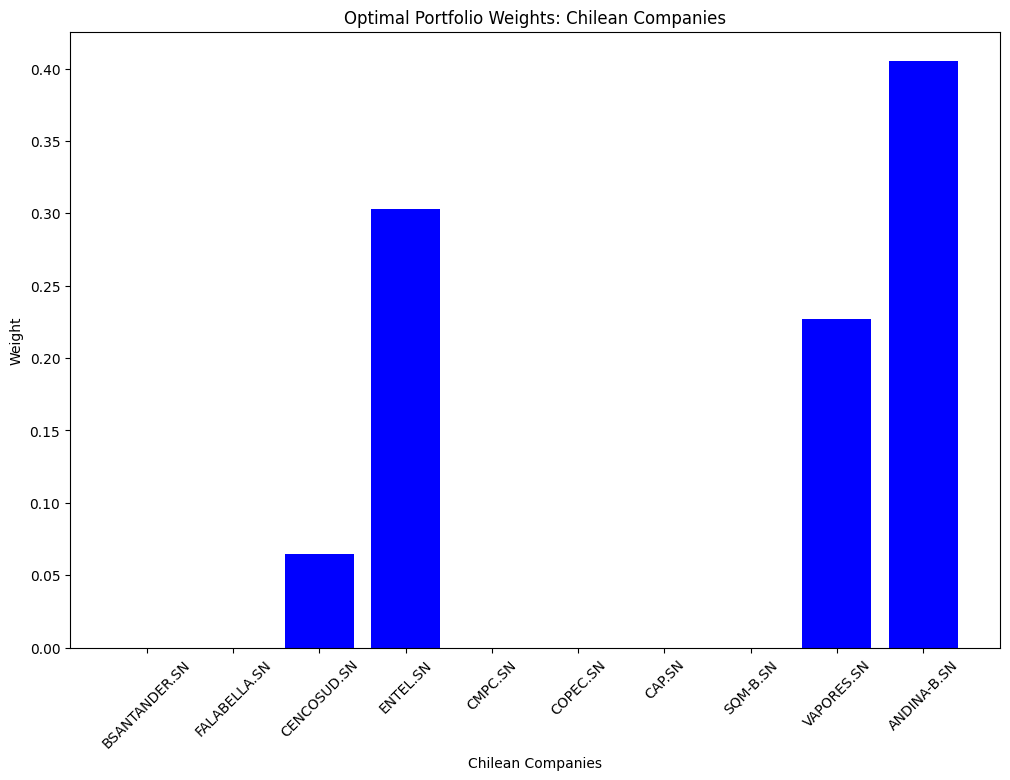

In [23]:
#Objective Function: Minimize Sharpe Ratio
#Risk free rat: 10%
def negative_sharpe_ratio(weights, risk_free_rate = 0.01):
    port_return = portfolio_return(weights) 
    port_volatility = portfolio_volatility(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return - sharpe_ratio  #negative to maximize 


#Restriction N° 1: Weights sum equal to 1
def constraint(weights):
    return np.sum(weights) - 1


#Border: Weights must be between 0 and 1 [0,1]

bounds = tuple((0,1) for _ in range(len(tickers)))

#Inicial Weight por each company: Equal Weight Portfolio, i.e., 1/10 = 0.10
initial_weights = np.array([1/len(tickers)]* len(tickers))

#Restriction Settings 
constraints = ({'type': 'eq', 'fun': constraint})

#Optimization
optimized = minimize(
    negative_sharpe_ratio,
    initial_weights,
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)


#Optimization Results

optimal_weights = optimized.x
optimal_return  = portfolio_return(optimal_weights)
optimal_volatility = portfolio_volatility(optimal_weights)
optimal_sharpe_ratio = (optimal_return - 0.01) / optimal_volatility


#Show results

print("Optimal Weights: ")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")
print(f"\nExpected Portfolio Performance: {optimal_return:.2%}")
print(f"#Expected Portfolio Volatility: {optimal_volatility:.2%}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio: .2%}")


## Optimal Portfolio: Graph

plt.figure(figsize=(12,8))
plt.bar(tickers, optimal_weights, color = 'blue')
plt.title("Optimal Portfolio Weights: Chilean Companies")
plt.ylabel("Weight")
plt.xlabel("Chilean Companies")
plt.xticks(rotation = 45)
plt.show()

                C. Portfolio N° 3: Invest at least 5% in each company

Optimal Weights: 
BSANTANDER.SN: 0.0500
FALABELLA.SN: 0.0500
CENCOSUD.SN: 0.0500
ENTEL.SN: 0.1180
CMPC.SN: 0.0500
COPEC.SN: 0.0500
CAP.SN: 0.0500
SQM-B.SN: 0.0500
VAPORES.SN: 0.1786
ANDINA-B.SN: 0.3534

Expected Portfolio Performance: 23.65%
#Expected Portfolio Volatility: 29.03%
Optimal Sharpe Ratio:  78.03%


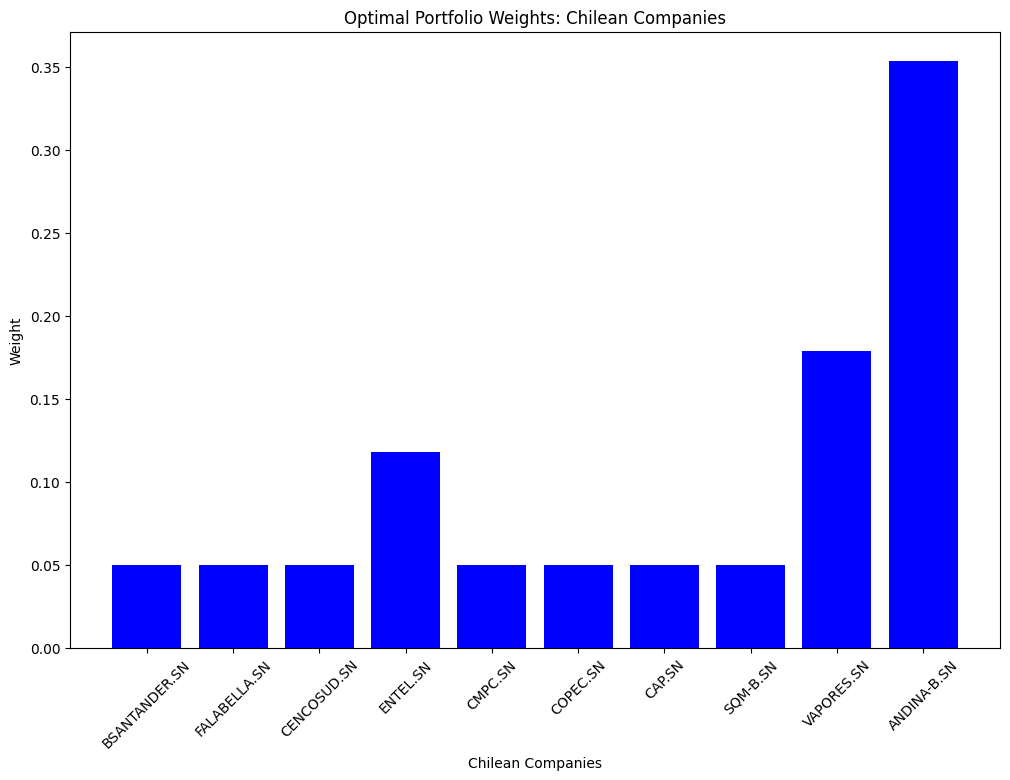

In [30]:
#Objective Function: Minimize Sharpe Ratio
#Risk free rat: 1%
def negative_sharpe_ratio(weights, risk_free_rate = 0.01):
    port_return = portfolio_return(weights) 
    port_volatility = portfolio_volatility(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return - sharpe_ratio  #negative to maximize 


#Restriction N° 1: Weights sum equal to 1
def constraint(weights):
    return np.sum(weights) - 1


#Border: Weights must be between 0 and 1 [0,1]

bounds = tuple((0.05,1) for _ in range(len(tickers)))

#Inicial Weight por each company: Equal Weight Portfolio, i.e., 1/10 = 0.10
initial_weights = np.array([1/len(tickers)]* len(tickers))

#Restriction Settings 
constraints = ({'type': 'eq', 'fun': constraint})

#Optimization
optimized = minimize(
    negative_sharpe_ratio,
    initial_weights,
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)


#Optimization Results

optimal_weights = optimized.x
optimal_return  = portfolio_return(optimal_weights)
optimal_volatility = portfolio_volatility(optimal_weights)
optimal_sharpe_ratio = (optimal_return - 0.01) / optimal_volatility


#Show results

print("Optimal Weights: ")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")
print(f"\nExpected Portfolio Performance: {optimal_return:.2%}")
print(f"#Expected Portfolio Volatility: {optimal_volatility:.2%}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio: .2%}")


## Optimal Portfolio: Graph

plt.figure(figsize=(12,8))
plt.bar(tickers, optimal_weights, color = 'blue')
plt.title("Optimal Portfolio Weights: Chilean Companies")
plt.ylabel("Weight")
plt.xlabel("Chilean Companies")
plt.xticks(rotation = 45)
plt.show()

            c. Portfolio N° 4: Invest at least 5% and maximum 20% in each Company

Optimal Weights: 
BSANTANDER.SN: 0.0500
FALABELLA.SN: 0.0500
CENCOSUD.SN: 0.1000
ENTEL.SN: 0.2000
CMPC.SN: 0.0500
COPEC.SN: 0.0500
CAP.SN: 0.0500
SQM-B.SN: 0.0500
VAPORES.SN: 0.2000
ANDINA-B.SN: 0.2000

Expected Portfolio Performance: 22.20%
#Expected Portfolio Volatility: 28.07%
Optimal Sharpe Ratio:  75.54%


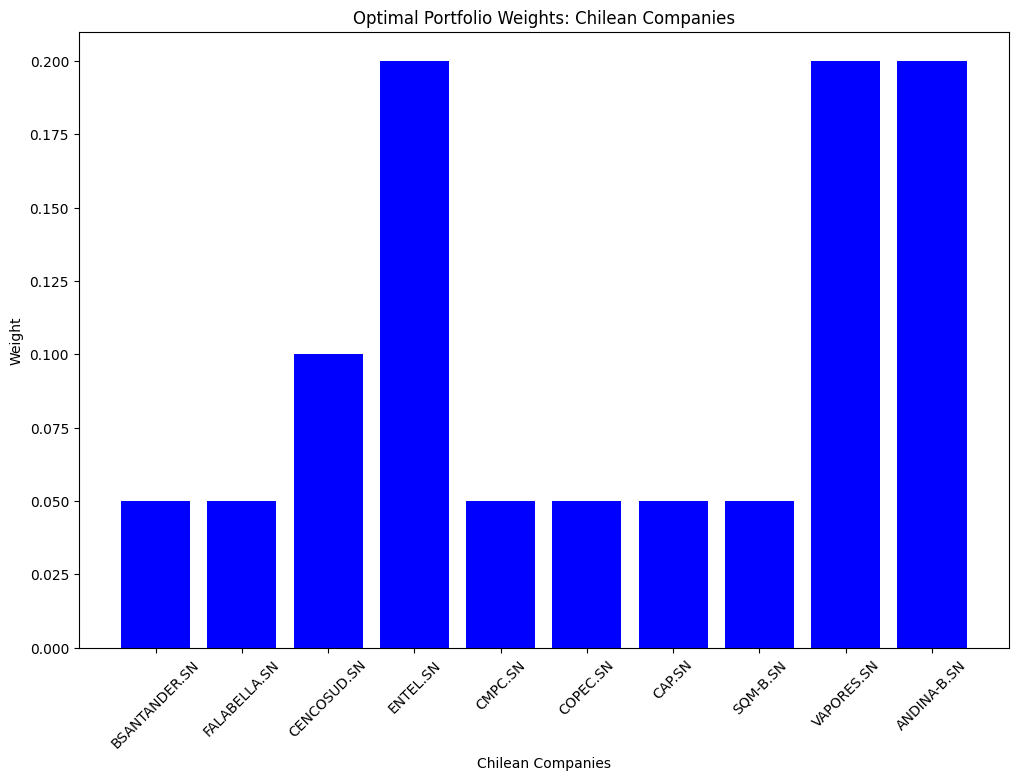

In [31]:
#Objective Function: Minimize Sharpe Ratio
#Risk free rat: 1%
def negative_sharpe_ratio(weights, risk_free_rate = 0.01):
    port_return = portfolio_return(weights) 
    port_volatility = portfolio_volatility(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return - sharpe_ratio  #negative to maximize 


#Restriction N° 1: Weights sum equal to 1
def constraint(weights):
    return np.sum(weights) - 1


#Border: Weights must be between 0 and 1 [0,1]

bounds = tuple((0.05,0.20) for _ in range(len(tickers)))

#Inicial Weight por each company: Equal Weight Portfolio, i.e., 1/10 = 0.10
initial_weights = np.array([1/len(tickers)]* len(tickers))

#Restriction Settings 
constraints = ({'type': 'eq', 'fun': constraint})

#Optimization
optimized = minimize(
    negative_sharpe_ratio,
    initial_weights,
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)


#Optimization Results

optimal_weights = optimized.x
optimal_return  = portfolio_return(optimal_weights)
optimal_volatility = portfolio_volatility(optimal_weights)
optimal_sharpe_ratio = (optimal_return - 0.01) / optimal_volatility


#Show results

print("Optimal Weights: ")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")
print(f"\nExpected Portfolio Performance: {optimal_return:.2%}")
print(f"#Expected Portfolio Volatility: {optimal_volatility:.2%}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio: .2%}")


## Optimal Portfolio: Graph

plt.figure(figsize=(12,8))
plt.bar(tickers, optimal_weights, color = 'blue')
plt.title("Optimal Portfolio Weights: Chilean Companies")
plt.ylabel("Weight")
plt.xlabel("Chilean Companies")
plt.xticks(rotation = 45)
plt.show()